In [2]:
"""
This file creates/shapes the shapefiles necessary for the preprocessing of data.

Note: Sometimes these shapefiles are too large to store in github.
To use them, follow the links to download the raw versions and run the code below to produce the desired files.

Note there are files of differing geographic granuality: census tracts, block groups, blocks.
They are named accordingly:  shapefiles/[state]/[level]_[regions]
level: (county|tract)
region: (e.g. middlesex_norfolk_suffolk)
e.g. /shapefiles/ma/blockgroup_middlesex_norfolk_suffolk.shp

"""
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point, Polygon

from util import get_shapefile_filename, get_shapefile_filepath



## Massachussetts Data

MA county shapefile downloaded from:  https://www2.census.gov/geo/pvs/tiger2010st/25_Massachusetts/25/

MA census tract, blockgroup, block level shapefiles downloaded from: https://docs.digital.mass.gov/dataset/massgis-data-datalayers-2010-us-census

### Restricted to counties: Middlesex, Norfolk, Suffolk

We create shapefiles where the regions are restricted to the desired counties.
Shapefiles are created for the following levels: county, census (2010) tract, blockgroup, block 

In [33]:
STATE = 'ma'

# Limit the map to just a subset of the counties
# Middlesex county (017), Suffolk (025), Norfolk (021)
keep_county_names = ['middlesex', 'norfolk', 'suffolk']
keep_county_codes = ['017', '025', '021']

### MA: County Level

./shapefiles/ma/county.shp


,STATEFP10,COUNTYFP10,COUNTYNS10,GEOID10,NAME10,NAMELSAD10,LSAD10,CLASSFP10,MTFCC10,CSAFP10,CBSAFP10,METDIVFP10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,25,023,00606938,25023,Plymouth,Plymouth County,06,H1,G4020,148,14460,14484,A,1706996627,1124514395,+41.9871959,-070.7419417,"POLYGON ((-70.924877 42.15758, -70.92462999999..."
1,25,003,00606928,25003,Berkshire,Berkshire County,06,H4,G4020,None,38340,None,N,2400465435,50772406,+42.3753141,-073.2139479,"POLYGON ((-73.410843 42.351738, -73.40639 42.3..."
2,25,001,00606927,25001,Barnstable,Barnstable County,06,H1,G4020,None,12700,None,A,1019738402,2361587952,+41.7988188,-070.2110827,"POLYGON ((-70.669518 41.51333899999999, -70.67..."


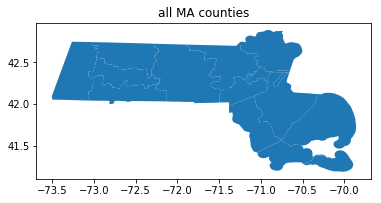

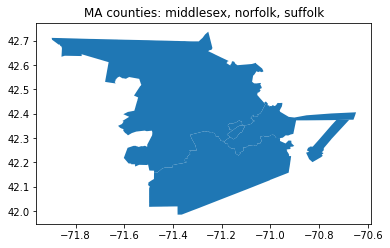

In [41]:
# Creating the county level shapefile

ma_county_shapefile_filepath = get_shapefile_filepath('ma', 'county')
print(ma_county_shapefile_filepath)

ma_county_shapefile = gpd.read_file(ma_county_shapefile_filepath)
ma_county_shapefile.plot()
plt.title('all MA counties')

# Create restricted shapefile with just counties of interest
pruned_ma_county_shapefile = ma_county_shapefile[ma_county_shapefile['COUNTYFP10'].isin(keep_county_codes)]
pruned_ma_county_shapefile.plot()
plt.title('MA counties: ' + ', '.join(keep_county_names))

ma_county_shapefile.head(3)

In [46]:
# Save the shapefile
county_region_shapefile_filepath = get_shapefile_filepath('ma', 'county', keep_county_names)
print('saving shapefile to '  + county_region_shapefile_filepath)
pruned_ma_county_shapefile.to_file(county_region_shapefile_filepath)

saving shapefile to ./shapefiles/ma/county_middlesex_norfolk_suffolk.shp


### MA: Census Tract Level

opening ./shapefiles/ma/tract.shp


,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN,geometry
0,25,021,418003,25021418003,4180.03,Census Tract 4180.03,G5020,1705668.0,2936.0,+42.2350240,...,422.1740,2481,1350,0141872,123764,0003690,0123764,1.708484e+06,6274.185034,"POLYGON ((240678.7591999993 886748.0731000006,..."
1,25,021,417701,25021417701,4177.01,Census Tract 4177.01,G5020,1543651.0,12275.0,+42.2523398,...,384.4502,5417,2983,0141838,123730,0003683,0123730,1.555821e+06,6229.137913,"POLYGON ((240969.6662999988 890122.8055999987,..."
2,25,021,417702,25021417702,4177.02,Census Tract 4177.02,G5020,1685529.0,317947.0,+42.2582818,...,416.4918,2765,1109,0141843,123735,0003684,0123735,1.685489e+06,8542.498286,"POLYGON ((242328.2212999985 890545.0498999991,..."


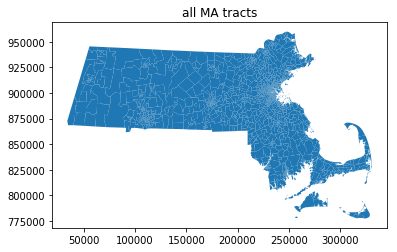

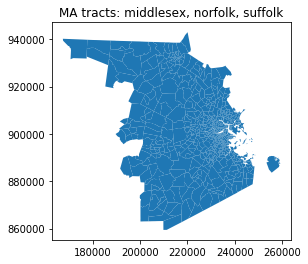

In [49]:
# Creating the census tract level shapefile

ma_tract_shapefile_filepath = get_shapefile_filepath('ma', 'tract')
print('opening ' + ma_tract_shapefile_filepath)

ma_tract_shapefile = gpd.read_file(ma_tract_shapefile_filepath)
ma_tract_shapefile.plot()
plt.title('all MA tracts')

# Create restricted shapefile with just counties of interest
pruned_ma_tract_shapefile = ma_tract_shapefile[ma_tract_shapefile['COUNTYFP10'].isin(keep_county_codes)]
pruned_ma_tract_shapefile.plot()
plt.title('MA tracts: ' + ', '.join(keep_county_names))

pruned_ma_tract_shapefile.head(3)

In [48]:
# Save the shapefile
tract_region_shapefile_filepath = get_shapefile_filepath('ma', 'tract', keep_county_names)
print('saving shapefile to '  + tract_region_shapefile_filepath)
pruned_ma_tract_shapefile.to_file(tract_region_shapefile_filepath)

saving shapefile to ./shapefiles/ma/tract_middlesex_norfolk_suffolk.shp


### MA: Census Blockgroup Level

opening ./shapefiles/ma/blockgroup.shp


,STATEFP10,COUNTYFP10,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,AREA_ACRES,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGACS0610,LOGSF1C,SHAPE_AREA,SHAPE_LEN,geometry
317,25,021,456402,2,250214564022,Block Group 2,G5030,5107660.0,104225.0,+42.0980485,...,1287.7929,1331,465,0142091,123983,0007625,0123983,5.211534e+06,9996.085232,"POLYGON ((233650.2687999979 871197.0775000006,..."
318,25,021,456402,1,250214564021,Block Group 1,G5030,4674851.0,343496.0,+42.0856597,...,1239.9721,981,312,0142090,123982,0007624,0123982,5.018009e+06,10171.313638,"POLYGON ((232029.2741999999 870348.8266999982,..."
319,25,021,456402,3,250214564023,Block Group 3,G5030,3420837.0,237352.0,+42.1168451,...,903.8929,2387,801,0142092,123984,0007626,0123984,3.657940e+06,8622.142376,"POLYGON ((231553.1279999986 874670.0720999986,..."


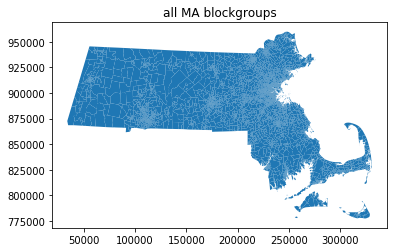

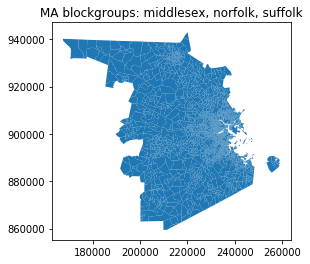

In [51]:
# Creating the census blockgroup level shapefile

ma_blockgroup_shapefile_filepath = get_shapefile_filepath('ma', 'blockgroup')
print('opening ' + ma_blockgroup_shapefile_filepath)

ma_blockgroup_shapefile = gpd.read_file(ma_blockgroup_shapefile_filepath)
ma_blockgroup_shapefile.plot()
plt.title('all MA blockgroups')

# Create restricted shapefile with just counties of interest
pruned_ma_blockgroup_shapefile = ma_blockgroup_shapefile[ma_blockgroup_shapefile['COUNTYFP10'].isin(keep_county_codes)]
pruned_ma_blockgroup_shapefile.plot()
plt.title('MA blockgroups: ' + ', '.join(keep_county_names))

pruned_ma_blockgroup_shapefile.head(3)

In [52]:
# Save the shapefile
blockgroup_region_shapefile_filepath = get_shapefile_filepath('ma', 'blockgroup', keep_county_names)
print('saving shapefile to '  + blockgroup_region_shapefile_filepath)
pruned_ma_blockgroup_shapefile.to_file(blockgroup_region_shapefile_filepath)

saving shapefile to ./shapefiles/ma/blockgroup_middlesex_norfolk_suffolk.shp


### MA: Census Block Level

(Note: Block level files are not stored in Github - they are too large)

opening ./shapefiles/ma/block.shp


,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE10,GEOID10,NAME10,MTFCC10,ALAND10,AWATER10,INTPTLAT10,...,TOWN_ID,COUSUBFP10,POP100_RE,HU100_RE,LOGPL94171,LOGSF1,LOGSF1C,SHAPE_AREA,SHAPE_LEN,geometry
67827,25,017,339100,1013,250173391001013,Block 1013,G5040,47927.0,0.0,+42.4400187,...,176,39835,0,0,0123401,92208,0092208,47923.835952,3775.462195,"POLYGON ((232522.2717000023 910902.5771999992,..."
67828,25,017,374800,2038,250173748002038,Block 2038,G5040,16126.0,0.0,+42.3349690,...,207,45560,0,0,0126886,96206,0096206,16125.316368,769.449212,"POLYGON ((220070.5636000037 898440.2743999995,..."
67829,25,017,374800,3022,250173748003022,Block 3022,G5040,19347.0,0.0,+42.3309285,...,207,45560,47,19,0126913,96236,0096236,19345.433116,590.751345,"POLYGON ((219722.6118000001 897739.9514999986,..."


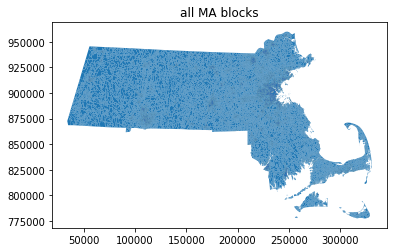

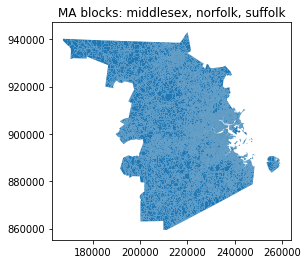

In [54]:
# Creating the census block level shapefile

ma_block_shapefile_filepath = get_shapefile_filepath('ma', 'block')
print('opening ' + ma_block_shapefile_filepath)

ma_block_shapefile = gpd.read_file(ma_block_shapefile_filepath)
ma_block_shapefile.plot()
plt.title('all MA blocks')

# Create restricted shapefile with just counties of interest
pruned_ma_block_shapefile = ma_block_shapefile[ma_block_shapefile['COUNTYFP10'].isin(keep_county_codes)]
pruned_ma_block_shapefile.plot()
plt.title('MA blocks: ' + ', '.join(keep_county_names))

pruned_ma_block_shapefile.head(3)

In [55]:
# Save the shapefile
block_region_shapefile_filepath = get_shapefile_filepath('ma', 'block', keep_county_names)
print('saving shapefile to '  + block_region_shapefile_filepath)
pruned_ma_block_shapefile.to_file(block_region_shapefile_filepath)

saving shapefile to ./shapefiles/ma/block_middlesex_norfolk_suffolk.shp
